<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-5/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [7]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'Survived'],
      dtype='object')

In [4]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [5]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [8]:
X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffled = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b , y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffled
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train , y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffled
)

In [9]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return (
        -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    ).mean()

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [20]:
lr = 0.1
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [21]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    train_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}: train_loss: {train_loss:.3f}, val_loss: {val_loss:.3f}")

Epoch 1: train_loss: 0.598, val_loss: 0.510
Epoch 2: train_loss: 0.475, val_loss: 0.500
Epoch 3: train_loss: 0.441, val_loss: 0.504
Epoch 4: train_loss: 0.428, val_loss: 0.509
Epoch 5: train_loss: 0.423, val_loss: 0.513
Epoch 6: train_loss: 0.420, val_loss: 0.516
Epoch 7: train_loss: 0.418, val_loss: 0.518
Epoch 8: train_loss: 0.417, val_loss: 0.520
Epoch 9: train_loss: 0.416, val_loss: 0.521
Epoch 10: train_loss: 0.416, val_loss: 0.523
Epoch 11: train_loss: 0.415, val_loss: 0.524
Epoch 12: train_loss: 0.415, val_loss: 0.524
Epoch 13: train_loss: 0.415, val_loss: 0.525
Epoch 14: train_loss: 0.415, val_loss: 0.526
Epoch 15: train_loss: 0.415, val_loss: 0.526
Epoch 16: train_loss: 0.415, val_loss: 0.526
Epoch 17: train_loss: 0.415, val_loss: 0.527
Epoch 18: train_loss: 0.415, val_loss: 0.527
Epoch 19: train_loss: 0.415, val_loss: 0.527
Epoch 20: train_loss: 0.415, val_loss: 0.527
Epoch 21: train_loss: 0.415, val_loss: 0.528
Epoch 22: train_loss: 0.415, val_loss: 0.528
Epoch 23: train_los

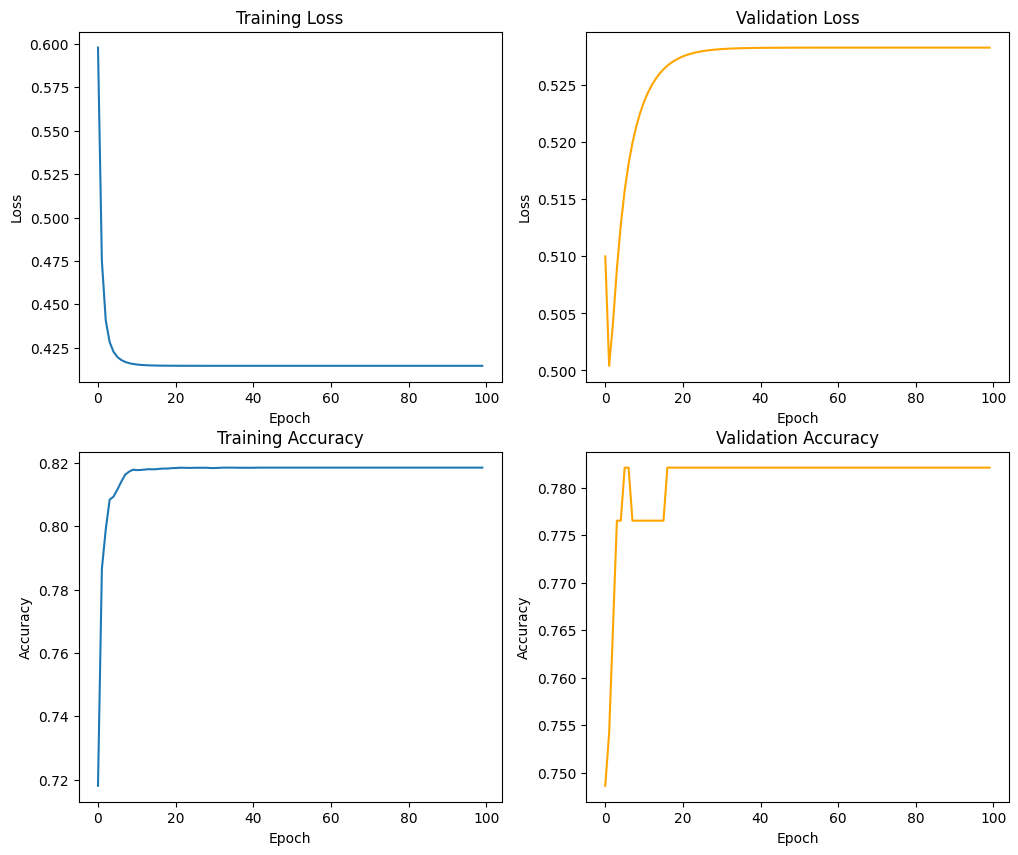

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [23]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set: ')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set: 
Accuracy: 0.7821229050279329
Accuracy: 0.7865168539325843


# Twitter Sentiment

In [24]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [27]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(
    dataset_path,
    index_col='id'
)
df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [28]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

In [29]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

In [30]:
def get_feature(text, freqs):
    tokens = text_normalize(text)
    X = np.zeros(3)
    X[0] = 1  # Bias term

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

In [31]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [32]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffled = True

X_train, X_val, y_train, y_val = train_test_split(
    X , y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffled
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train , y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffled
)

In [33]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [35]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return (
        -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    ).mean()

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [36]:
lr = 0.1
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [37]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    train_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}: train_loss: {train_loss:.3f}, val_loss: {val_loss:.3f}")

Epoch 1: train_loss: 0.436, val_loss: 0.390
Epoch 2: train_loss: 0.387, val_loss: 0.377
Epoch 3: train_loss: 0.380, val_loss: 0.373
Epoch 4: train_loss: 0.378, val_loss: 0.372
Epoch 5: train_loss: 0.378, val_loss: 0.371
Epoch 6: train_loss: 0.377, val_loss: 0.371
Epoch 7: train_loss: 0.377, val_loss: 0.371
Epoch 8: train_loss: 0.377, val_loss: 0.370
Epoch 9: train_loss: 0.377, val_loss: 0.370
Epoch 10: train_loss: 0.377, val_loss: 0.370
Epoch 11: train_loss: 0.377, val_loss: 0.370
Epoch 12: train_loss: 0.377, val_loss: 0.370
Epoch 13: train_loss: 0.377, val_loss: 0.370
Epoch 14: train_loss: 0.377, val_loss: 0.370
Epoch 15: train_loss: 0.377, val_loss: 0.370
Epoch 16: train_loss: 0.377, val_loss: 0.370
Epoch 17: train_loss: 0.377, val_loss: 0.370
Epoch 18: train_loss: 0.377, val_loss: 0.370
Epoch 19: train_loss: 0.377, val_loss: 0.370
Epoch 20: train_loss: 0.377, val_loss: 0.370
Epoch 21: train_loss: 0.377, val_loss: 0.370
Epoch 22: train_loss: 0.377, val_loss: 0.370
Epoch 23: train_los

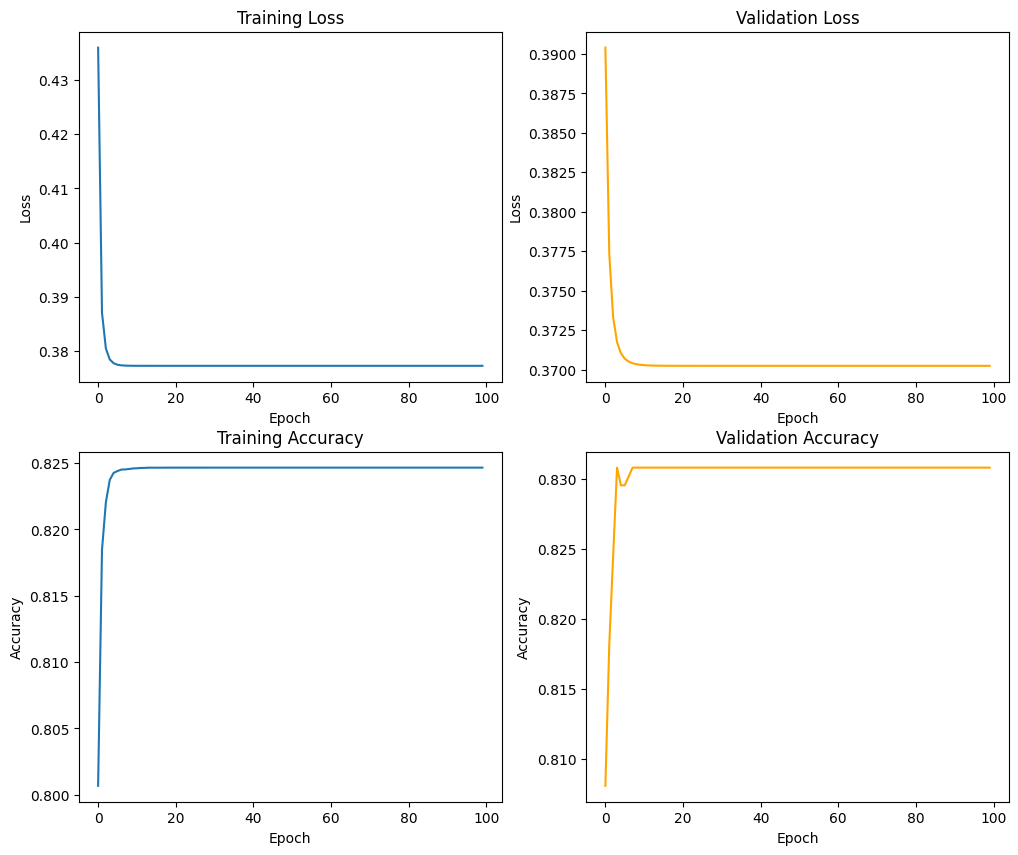

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [39]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set: ')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set: 
Accuracy: 0.8308080808080808
Accuracy: 0.8421717171717171
